#### Import Libraries

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib

#### Load Dataset

In [3]:
# Load  dataset
df = pd.read_csv("bcs.csv")

In [4]:
df.head()

,CONTRACTNO,Loan_Cycle,Avg_Repayment_Delay_(Days),Total_Loans_Taken,Default_Rate_(%),Frequent_Product_Category,Last_Loan_Amount(#),Last_Loan_Status,Loan_Reapplication_Frequency,Preferred_Payment_Method
0,2112094623CCTY,4,2,85,48,Agriculture,46791.07,Active,High,Bank Transfer
1,2229040701CCTY,2,4,44,87,Agriculture,66112.52,Delinquent,Low,Cash
2,2305927293CCTY,2,5,10,67,Technology & Gadgets,57004.08,Delinquent,Low,Mobile Money
3,2229073026CCTY,20,8,49,11,Trade & Commerce,7196.35,Paid,High,Mobile Money
4,2123670326CCTY,1,4,73,58,Transportation,20997.00,Paid,Low,Bank Transfer


In [5]:
# Drop irrelevant column
df.drop(columns=["CONTRACTNO"], inplace=True)

# Encode ordinal
df["Loan_Reapplication_Frequency"] = df["Loan_Reapplication_Frequency"].map({"Low": 0, "Medium": 1, "High": 2})

# Encode target
df["Last_Loan_Status"] = df["Last_Loan_Status"].map({"Paid": 0, "Active": 1, "Delinquent": 2})


In [6]:
# Encode categorical using LabelEncoder (or OneHot if needed)
cat_cols = ["Frequent_Product_Category", "Preferred_Payment_Method"]
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [7]:
# Standardize numerical
scaler = StandardScaler()
num_cols = ["Avg_Repayment_Delay_(Days)", "Default_Rate_(%)", "Last_Loan_Amount(#)"]
df[num_cols] = scaler.fit_transform(df[num_cols])

In [8]:
# Split data
X = df.drop("Last_Loan_Status", axis=1)
y = df["Last_Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)


c:\Users\DELL\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:56:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

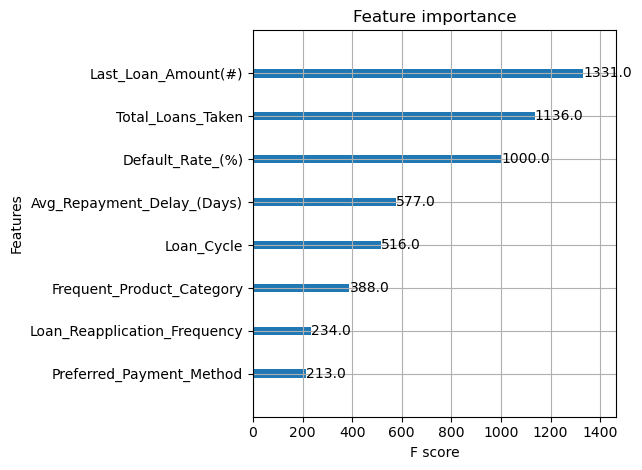

              precision    recall  f1-score   support

           0       0.43      0.44      0.43        34
           1       0.38      0.42      0.40        26
           2       0.44      0.40      0.42        40

    accuracy                           0.42       100
   macro avg       0.42      0.42      0.42       100
weighted avg       0.42      0.42      0.42       100



In [10]:
# Feature importance
plot_importance(model)
plt.tight_layout()
plt.show()

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

### Save Model

In [11]:
joblib.dump(model, 'behavioral_scoring_model.pkl')

['behavioral_scoring_model.pkl']